In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('../data/cleaned_data.csv')
data.head()

,Date_Partition,Customer_code,Employee_index,Cust_residence_country,Cust_gender,Age,Date_first_contract,New_customer_Index,Customer_seniority_months,Primary_cust_index,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
data['Date_Partition'] = pd.to_datetime(data['Date_Partition'])
data['Date_first_contract'] = pd.to_datetime(data['Date_first_contract'])

In [4]:
#print missing values in data
data.columns[data.isna().any()].tolist()

[]

In [5]:
data.shape

(989057, 45)

In [6]:
list(data.select_dtypes(include=['int64', 'float64']).columns)
numericData = data.select_dtypes(include=np.number)

In [7]:
numericData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989057 entries, 0 to 989056
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_code              989057 non-null  int64  
 1   Age                        989057 non-null  int64  
 2   New_customer_Index         989057 non-null  float64
 3   Customer_seniority_months  989057 non-null  int64  
 4   Primary_cust_index         989057 non-null  float64
 5   Cust_type                  989057 non-null  float64
 6   Address_type               989057 non-null  float64
 7   Province__code_cust        989057 non-null  float64
 8   Cust_activity              989057 non-null  float64
 9   Gross_income               989057 non-null  float64
 10  Saving_Account             989057 non-null  int64  
 11  Guarantees                 989057 non-null  int64  
 12  Current_Account            989057 non-null  int64  
 13  Derivada_Account           98

In [8]:
from sklearn.decomposition import PCA

pca = PCA(2)
df = pca.fit_transform(numericData)

In [9]:
from sklearn.cluster import KMeans


Kmean = KMeans(n_clusters=5)
y_kmeans=Kmean.fit_predict(numericData)

In [10]:
# y_kmeans = Kmean.predict(numericData)

In [11]:
y_kmeans

array([3, 3, 3, ..., 3, 3, 3])

In [12]:
u_labels = np.unique(y_kmeans)

In [13]:
u_labels

array([0, 1, 2, 3, 4])

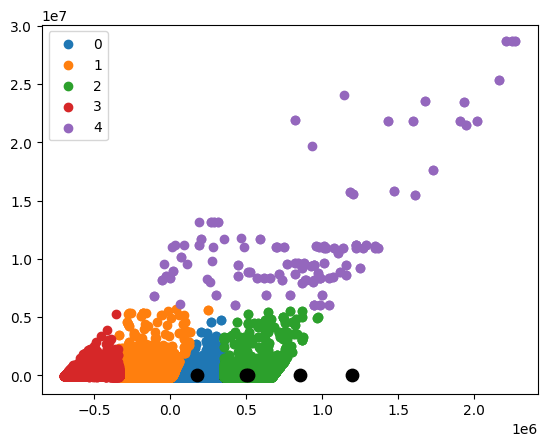

In [14]:
for i in u_labels:
    plt.scatter(df[y_kmeans == i , 0] , df[y_kmeans == i , 1] , label = i)
centroids = Kmean.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## EDA ON FEATURES

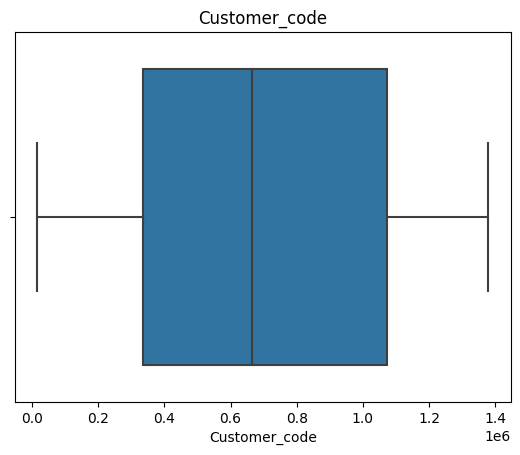

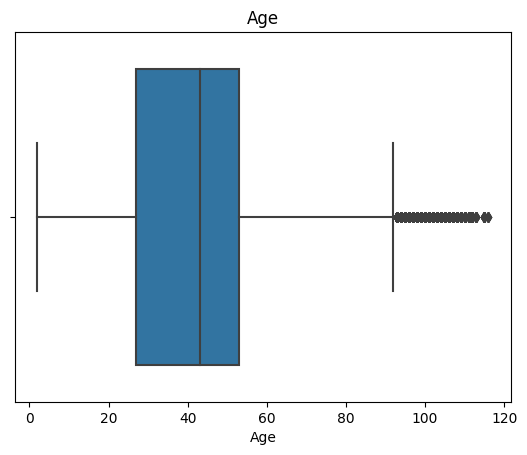

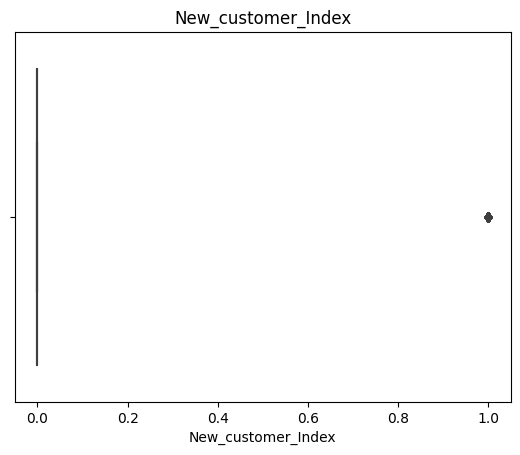

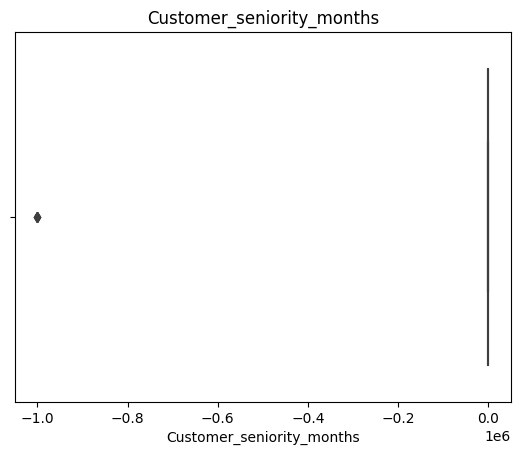

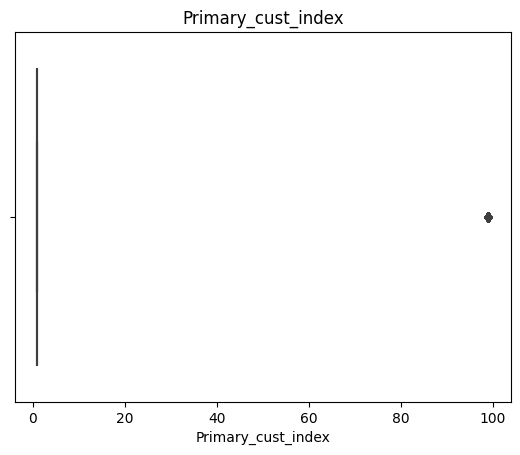

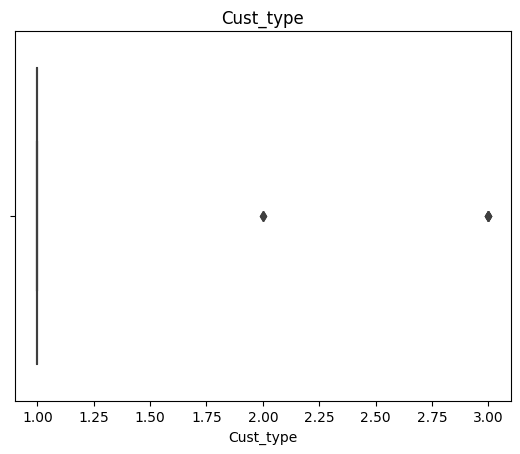

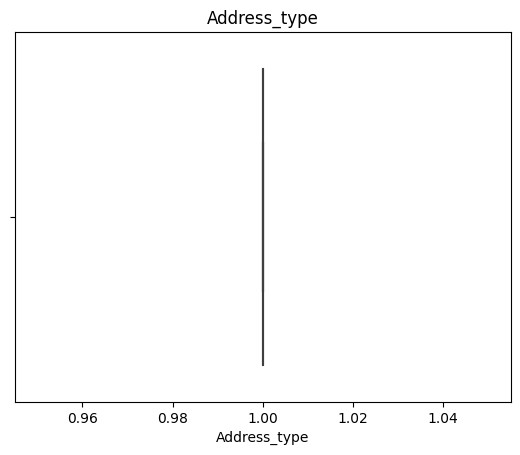

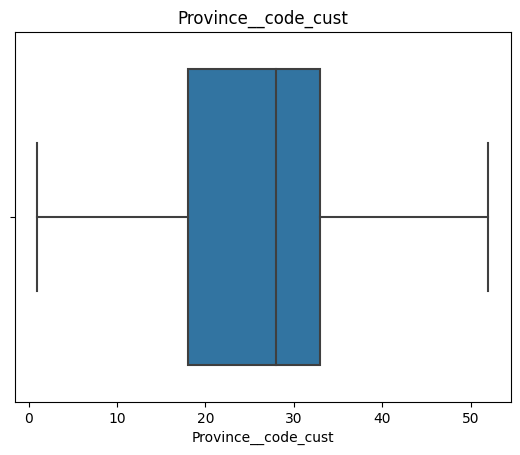

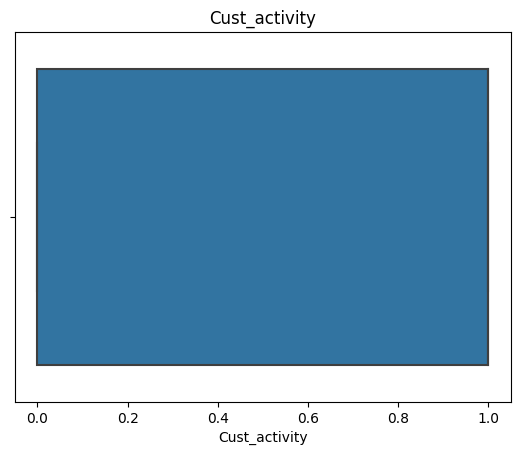

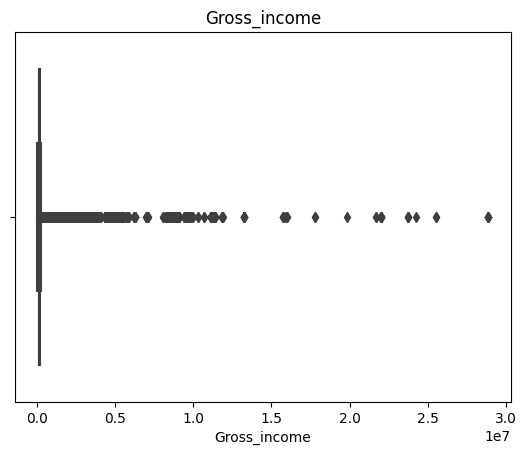

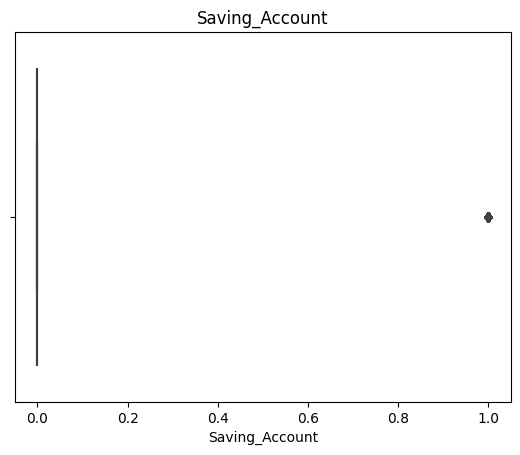

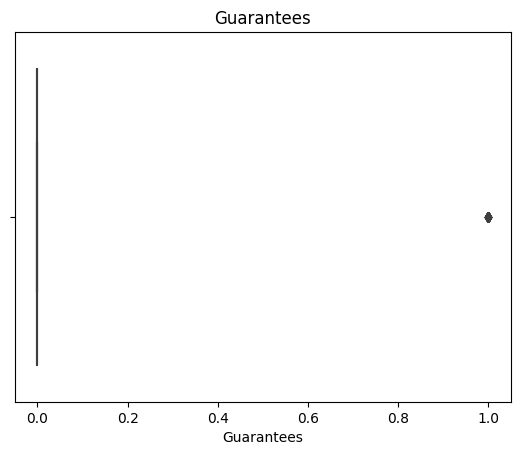

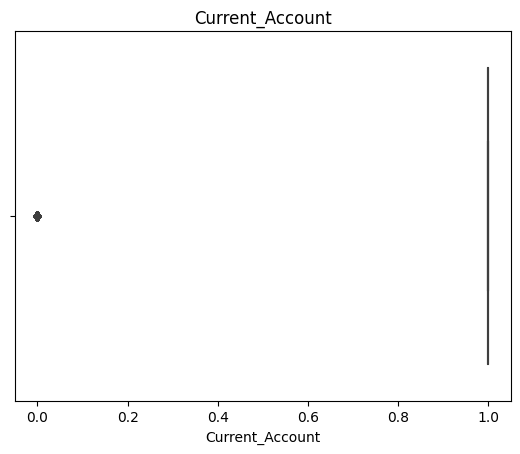

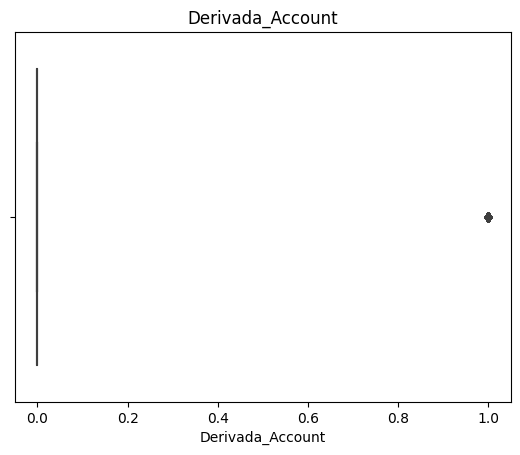

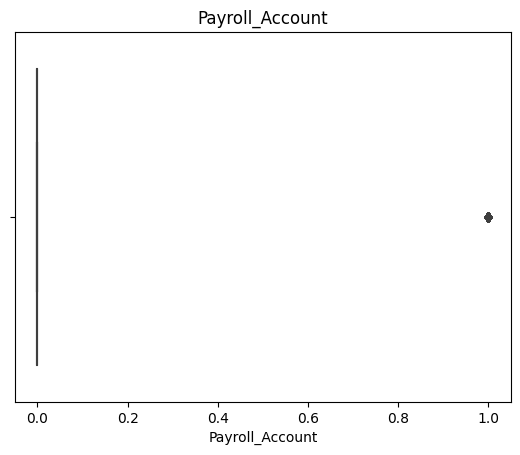

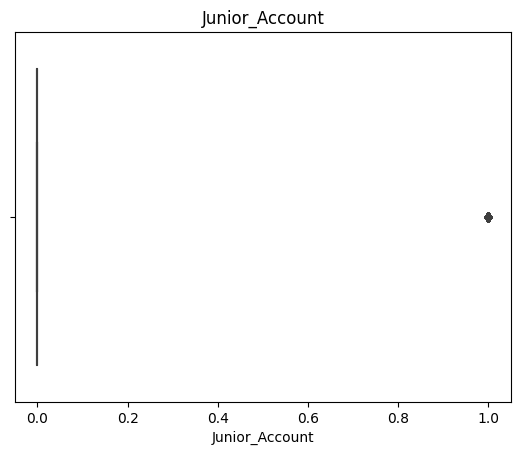

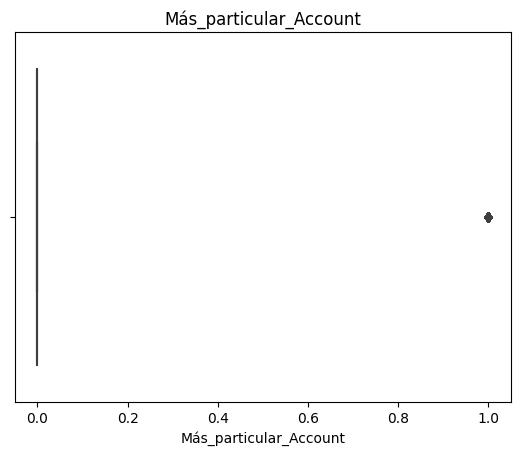

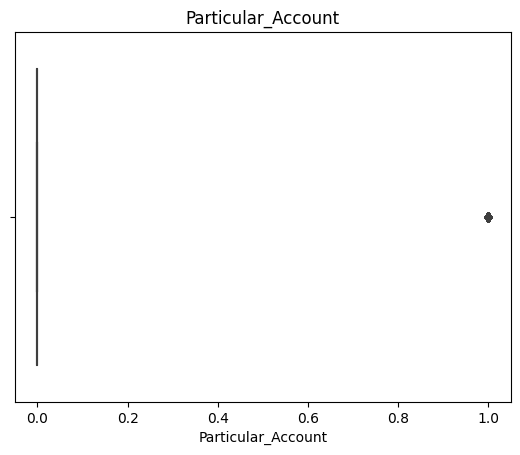

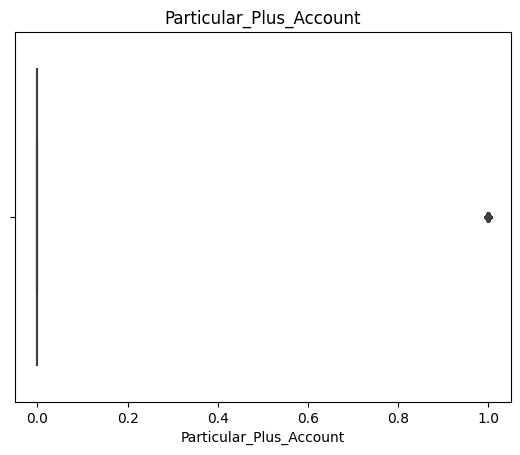

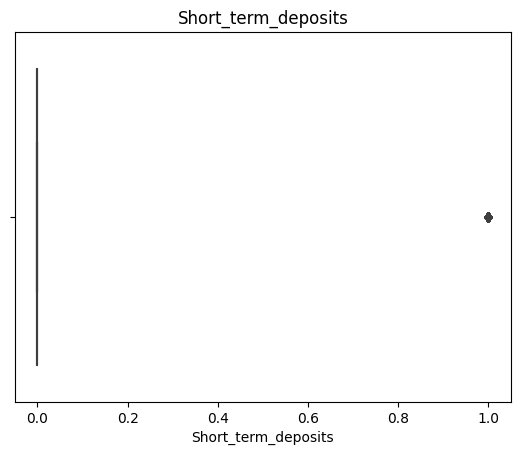

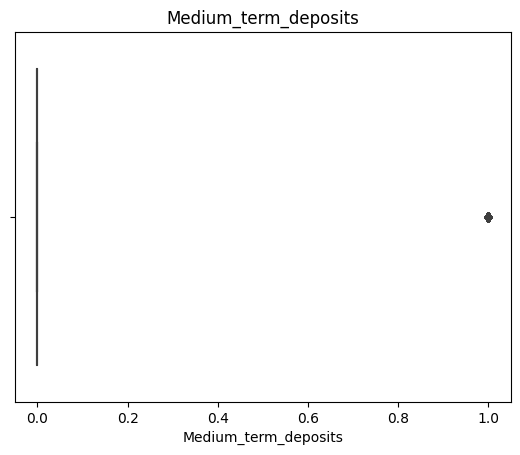

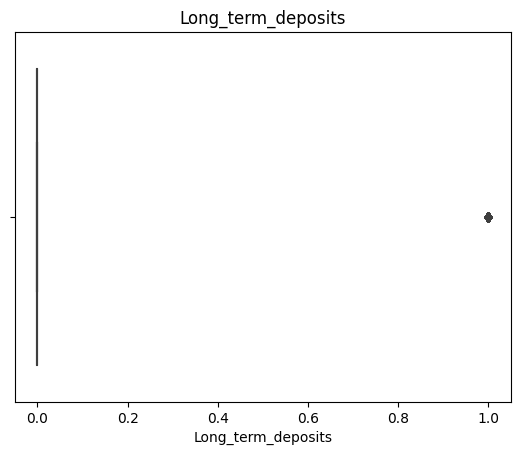

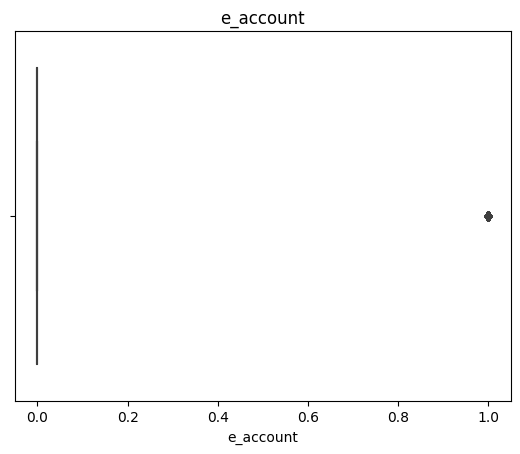

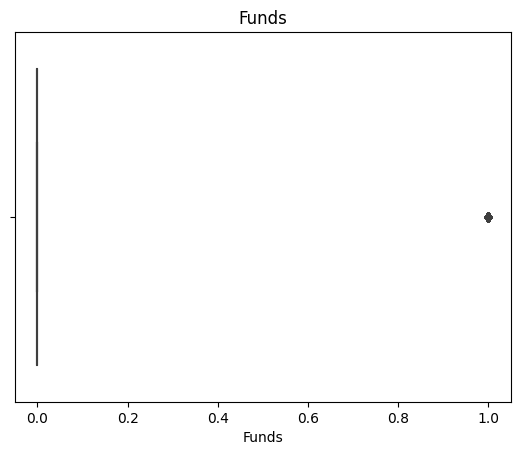

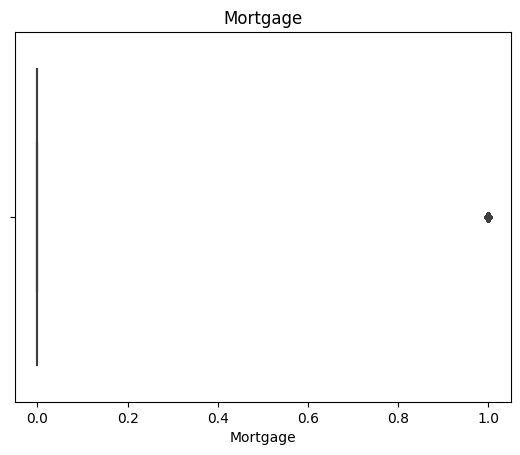

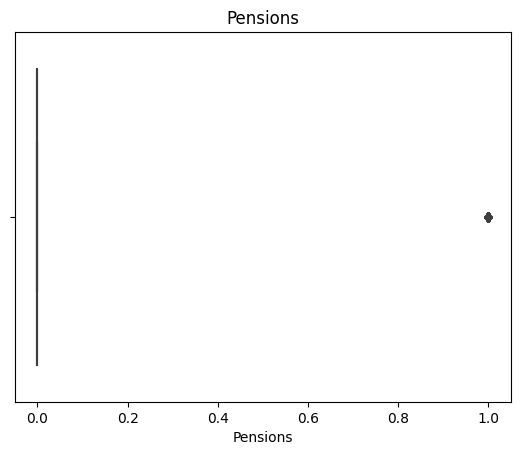

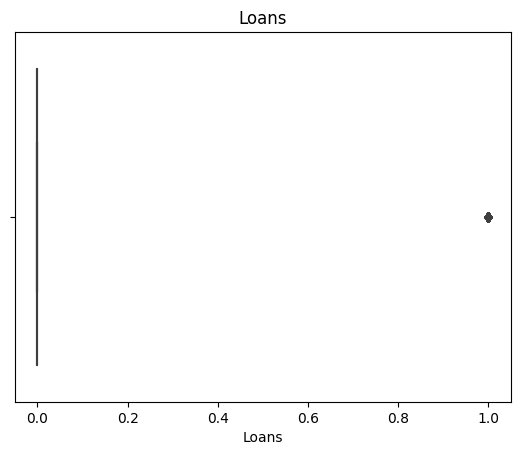

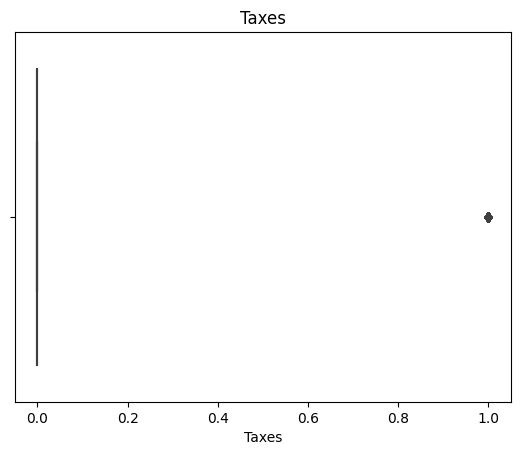

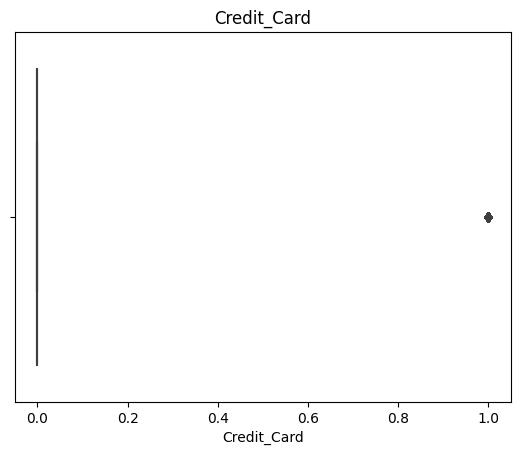

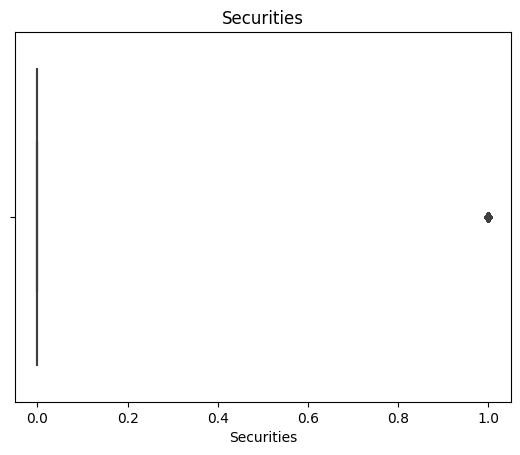

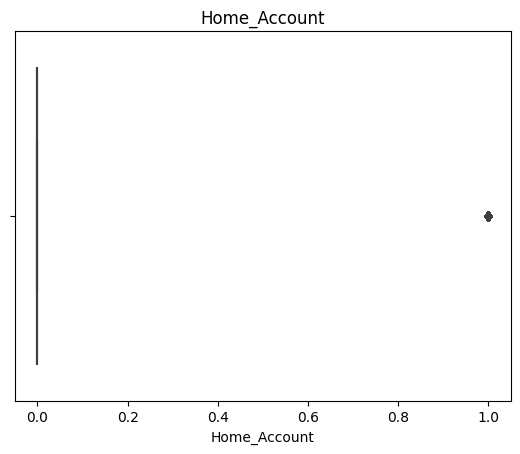

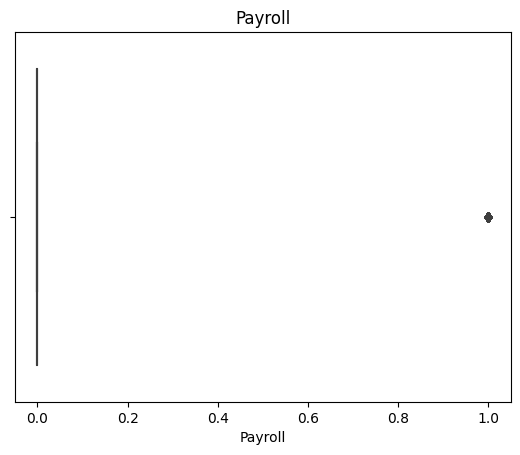

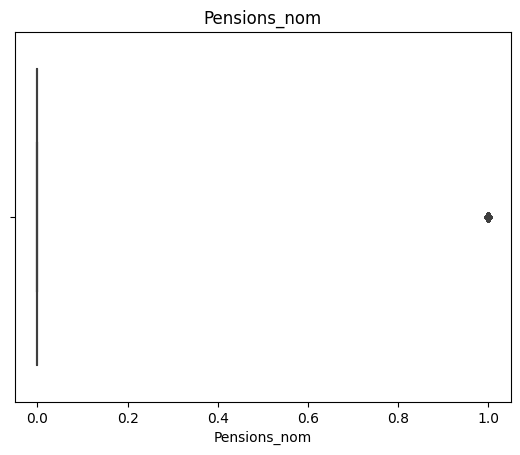

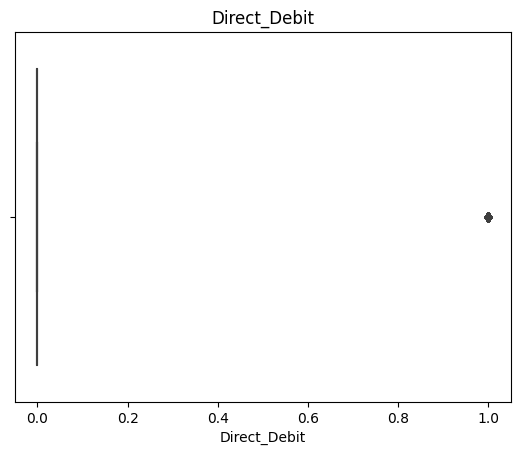

In [15]:
# boxplot for each numeric variable
for i in numericData.columns:
    plt.figure()
    sns.boxplot(x=numericData[i])
    plt.title(i)
    plt.show()

In [16]:
# EDA for categorical variables
categoricalData = data.select_dtypes(include=['object'])
categoricalData.head()

,Employee_index,Cust_residence_country,Cust_gender,Cust_relation,Residence_index,Foreigner_index,Channel_cust_join,Deceased_index,Province_name
0,N,ES,H,A,S,N,KHL,N,MALAGA
1,N,ES,V,I,S,S,KHE,N,CIUDAD REAL
2,N,ES,V,I,S,N,KHE,N,CIUDAD REAL
3,N,ES,H,I,S,N,KHD,N,ZARAGOZA
4,N,ES,V,A,S,N,KHE,N,ZARAGOZA


In [17]:
#remove time data type from categorical data
categoricalData = categoricalData.select_dtypes(exclude=['object'])

In [18]:
#EDA for categorical variables
for i in categoricalData.columns:
    plt.figure()
    sns.catplot(x=categoricalData[i])
    plt.title(i)
    plt.show()

In [19]:
#EDA for categorical variables
for i in categoricalData.columns:
    plt.figure()
    sns.catplot(x=categoricalData[i], hue=data['Churn'])
    plt.title(i)
    plt.show()

In [20]:
data.head()

,Date_Partition,Customer_code,Employee_index,Cust_residence_country,Cust_gender,Age,Date_first_contract,New_customer_Index,Customer_seniority_months,Primary_cust_index,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [21]:
# group by customer code and get the mean of each variable
groupedData = data.groupby('Customer_code').count()
groupedData.head()

,Date_Partition,Employee_index,Cust_residence_country,Cust_gender,Age,Date_first_contract,New_customer_Index,Customer_seniority_months,Primary_cust_index,Cust_type,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
Customer_code,,,,,,,,,,,,,,,,,,,,,
15889,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
15890,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
15892,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
15893,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
15894,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [22]:
groupedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619076 entries, 15889 to 1379131
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Date_Partition             619076 non-null  int64
 1   Employee_index             619076 non-null  int64
 2   Cust_residence_country     619076 non-null  int64
 3   Cust_gender                619076 non-null  int64
 4   Age                        619076 non-null  int64
 5   Date_first_contract        619076 non-null  int64
 6   New_customer_Index         619076 non-null  int64
 7   Customer_seniority_months  619076 non-null  int64
 8   Primary_cust_index         619076 non-null  int64
 9   Cust_type                  619076 non-null  int64
 10  Cust_relation              619076 non-null  int64
 11  Residence_index            619076 non-null  int64
 12  Foreigner_index            619076 non-null  int64
 13  Channel_cust_join          619076 non-null  int64
 14 

<AxesSubplot: xlabel='Age', ylabel='Count'>

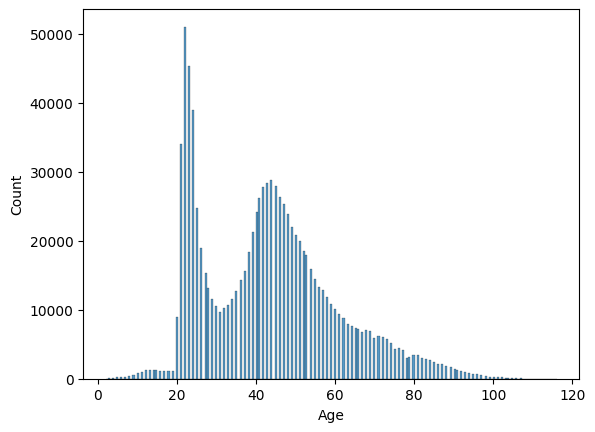

In [23]:
# histplot for age
sns.histplot(data=data, x='Age', multiple='stack')

<AxesSubplot: xlabel='Cust_gender', ylabel='Count'>

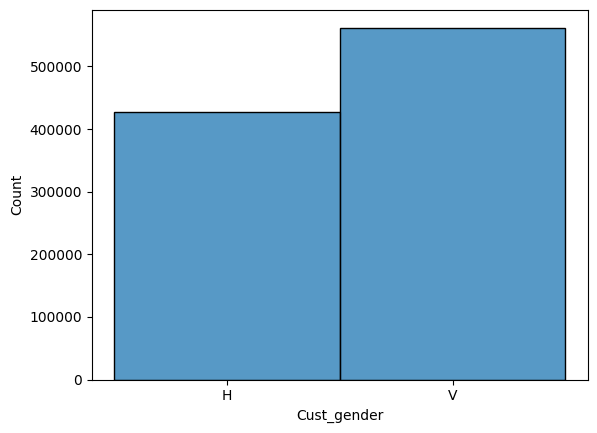

In [24]:
# gender histplot
sns.histplot(data=data, x="Cust_gender", multiple="stack")

<AxesSubplot: xlabel='Province_name', ylabel='Count'>

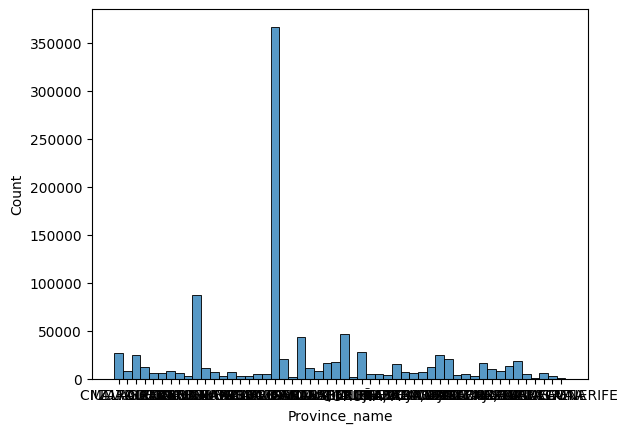

In [25]:
# histplot for country
sns.histplot(data=data, x="Province_name", multiple="stack")

In [26]:
#group data by Province_name and get the count of each variable
groupedData = data.groupby(['Province_name', 'Cust_gender'])['Customer_code'].count()

In [27]:
groupedData.head()

Province_name  Cust_gender
ALAVA          H              1055
               V              1823
ALBACETE       H              3414
               V              3880
ALICANTE       H              8206
Name: Customer_code, dtype: int64

<AxesSubplot: xlabel='Province_name', ylabel='count'>

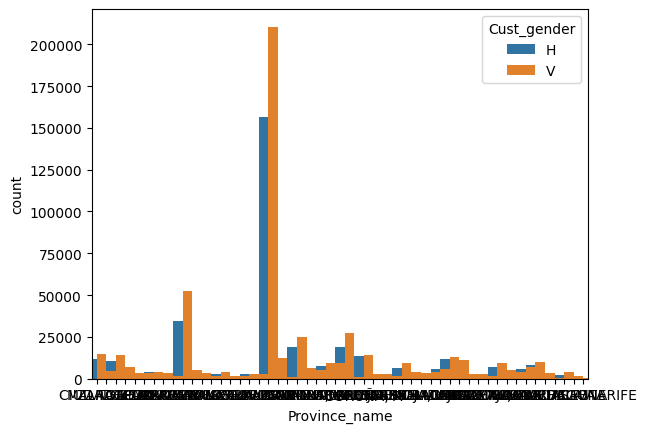

In [28]:
# bar plot for grouped data
sns.countplot(data=data, x="Province_name", hue="Cust_gender", width=2)

<AxesSubplot: xlabel='Province_name', ylabel='Age'>

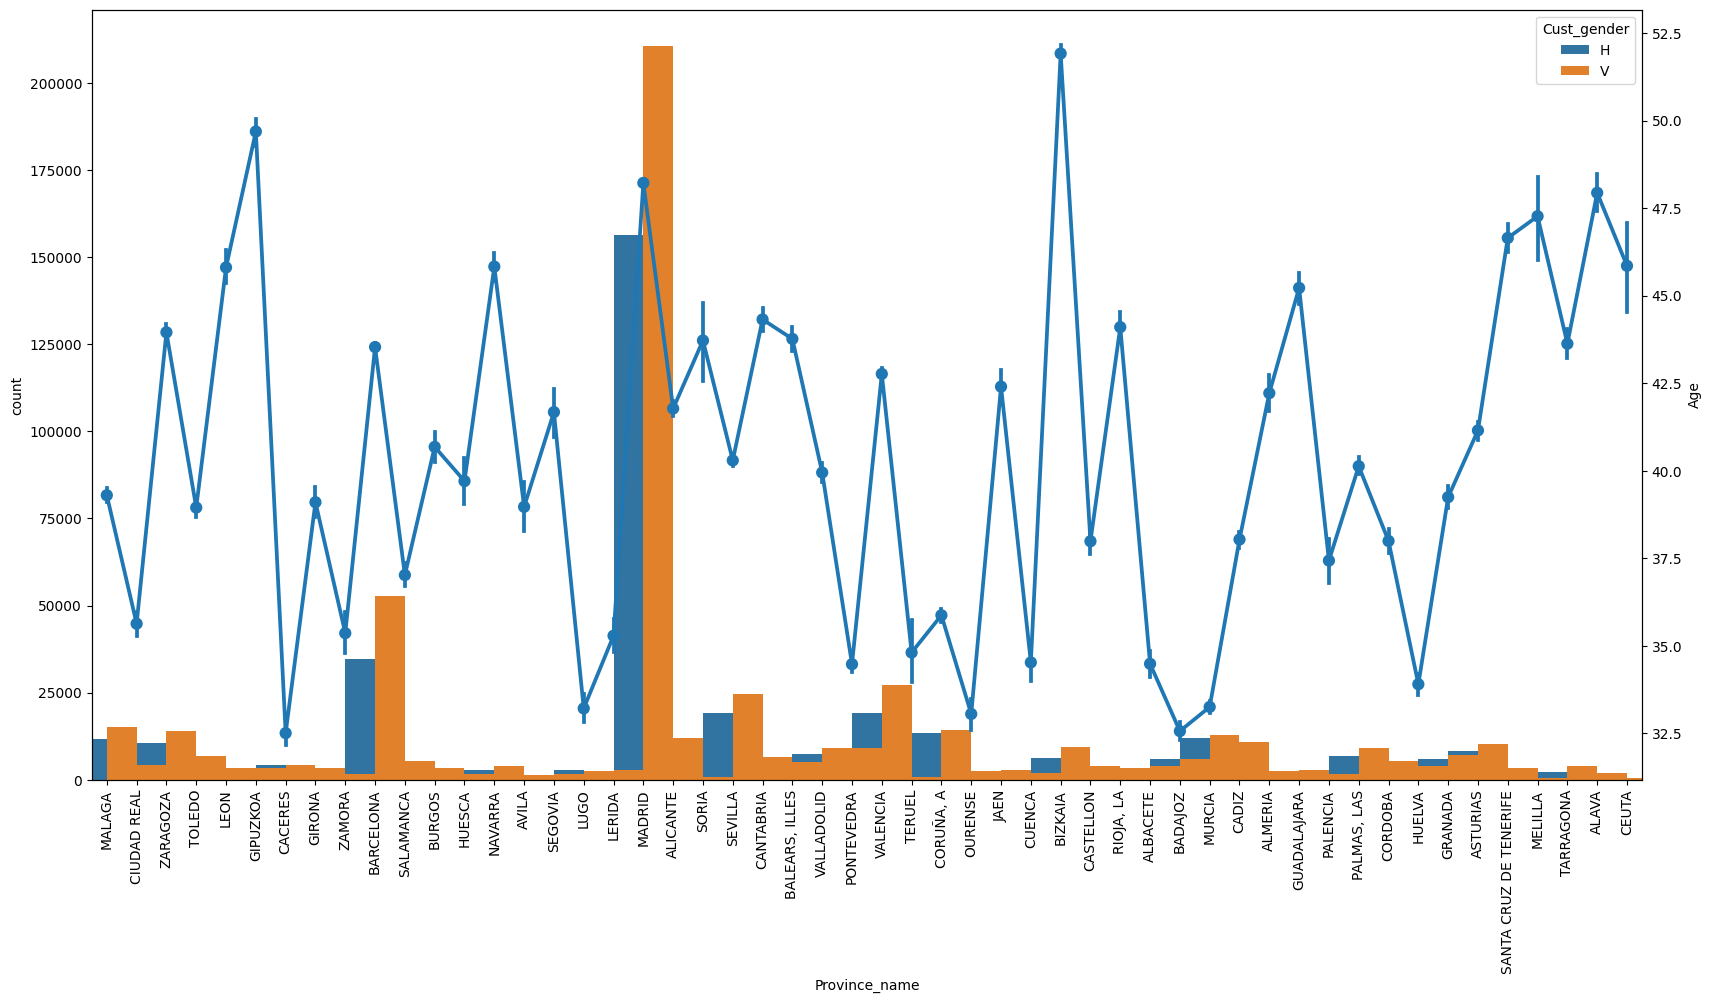

In [29]:
fig = plt.figure()
plt.xticks(rotation=90)
fig.set_size_inches(20, 10)
ax1 = sns.countplot(data=data, x="Province_name", hue="Cust_gender", width=2)
ax2 = ax1.twinx()
sns.pointplot(x='Province_name', y='Age', data=data, ax=ax2)

<AxesSubplot: xlabel='Province_name', ylabel='Gross_income'>

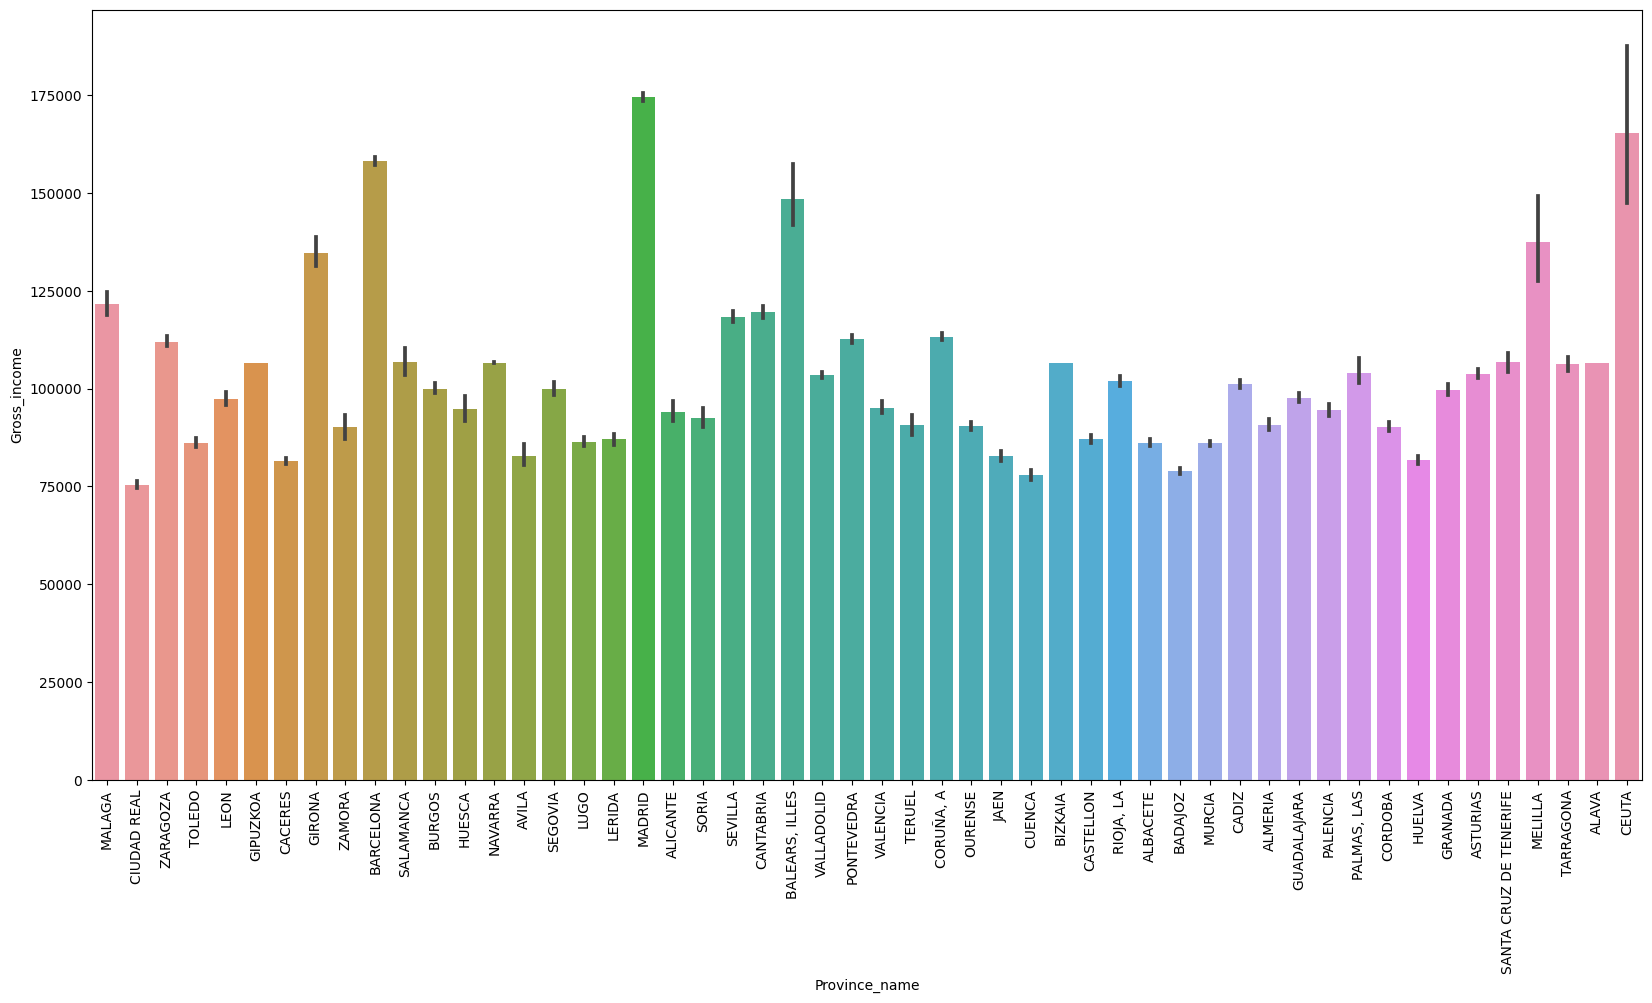

In [34]:
fig = plt.figure()
plt.xticks(rotation=90)
fig.set_size_inches(20, 10)
# sns.countplot(data=data, x="Cust_gender", hue="Gross_income", width=2)
# ax2 = ax1.twinx()
sns.barplot(x='Province_name', y='Gross_income', data=data)

<AxesSubplot: xlabel='Province_name', ylabel='Gross_income'>

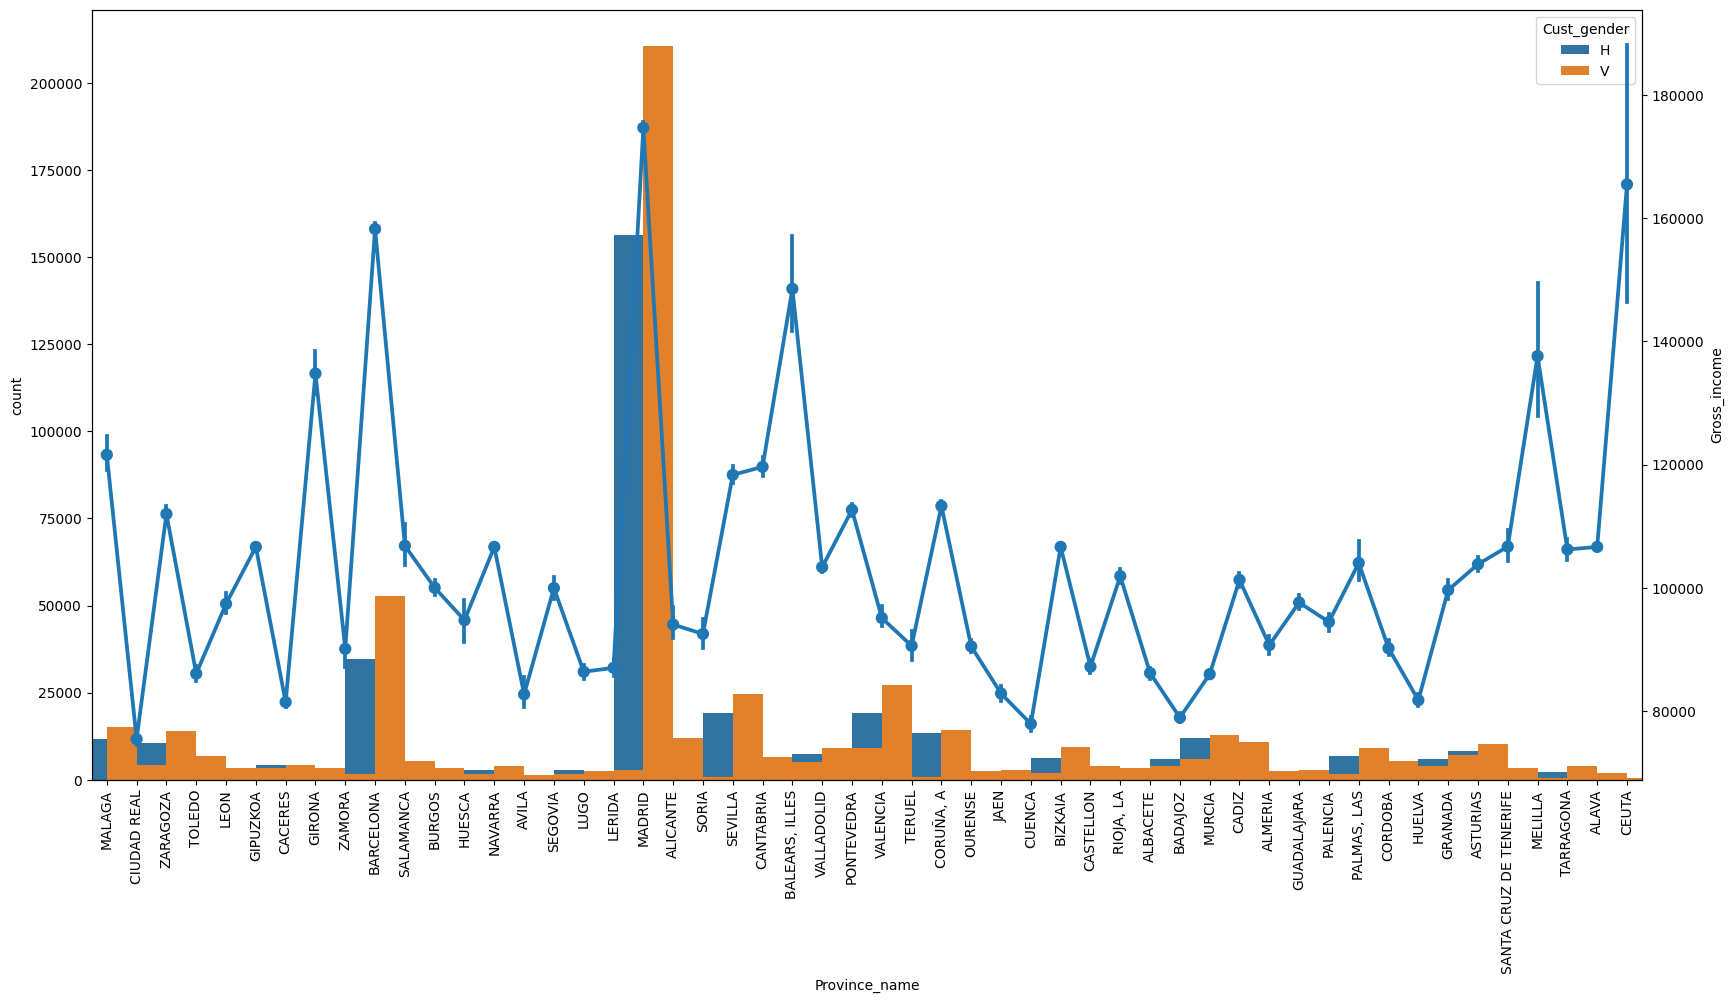

In [35]:
fig = plt.figure()
plt.xticks(rotation=90)
fig.set_size_inches(20, 10)
ax1 = sns.countplot(data=data, x="Province_name", hue="Cust_gender", width=2)
ax2 = ax1.twinx()
sns.pointplot(x='Province_name', y='Gross_income', data=data, ax=ax2)

In [36]:
#get column names of data
data.columns

Index(['Date_Partition', 'Customer_code', 'Employee_index',
       'Cust_residence_country', 'Cust_gender', 'Age', 'Date_first_contract',
       'New_customer_Index', 'Customer_seniority_months', 'Primary_cust_index',
       'Cust_type', 'Cust_relation', 'Residence_index', 'Foreigner_index',
       'Channel_cust_join', 'Deceased_index', 'Address_type',
       'Province__code_cust', 'Province_name', 'Cust_activity', 'Gross_income',
       'Saving_Account', 'Guarantees', 'Current_Account', 'Derivada_Account',
       'Payroll_Account', 'Junior_Account', 'Más_particular_Account',
       'Particular_Account', 'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_nom', 'Direct_Debit'],
      dtype='object')

In [37]:
# create product list from data
products = ['Saving_Account', 'Guarantees', 'Current_Account', 'Derivada_Account',
       'Payroll_Account', 'Junior_Account', 'Más_particular_Account',
       'Particular_Account', 'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_nom', 'Direct_Debit']

In [42]:
# group data by customer_id on product and get the count of each variable
productData = data.groupby('Customer_code')[products].sum()
productData.head()

,Saving_Account,Guarantees,Current_Account,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,Particular_Account,Particular_Plus_Account,Short_term_deposits,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
Customer_code,,,,,,,,,,,,,,,,,,,,,
15889,0,0,2,0,0,0,0,0,2,0,...,0,0,0,0,1,2,0,0.0,0.0,0
15890,0,0,0,0,2,0,0,0,2,0,...,0,2,0,0,2,0,0,2.0,2.0,2
15892,0,0,0,0,2,0,0,0,0,0,...,0,0,0,2,2,2,0,0.0,0.0,2
15893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0.0,0.0,0
15894,0,0,2,0,1,0,0,0,0,0,...,0,0,0,2,2,2,0,2.0,2.0,2


In [43]:
# total number of products
productData['Total_Products'] = productData.sum(axis=1)

In [44]:
productData.head()

,Saving_Account,Guarantees,Current_Account,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,Particular_Account,Particular_Plus_Account,Short_term_deposits,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit,Total_Products
Customer_code,,,,,,,,,,,,,,,,,,,,,
15889,0,0,2,0,0,0,0,0,2,0,...,0,0,0,1,2,0,0.0,0.0,0,7.0
15890,0,0,0,0,2,0,0,0,2,0,...,2,0,0,2,0,0,2.0,2.0,2,16.0
15892,0,0,0,0,2,0,0,0,0,0,...,0,0,2,2,2,0,0.0,0.0,2,14.0
15893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0.0,0.0,0,4.0
15894,0,0,2,0,1,0,0,0,0,0,...,0,0,2,2,2,0,2.0,2.0,2,19.0


<AxesSubplot: xlabel='Total_Products', ylabel='count'>

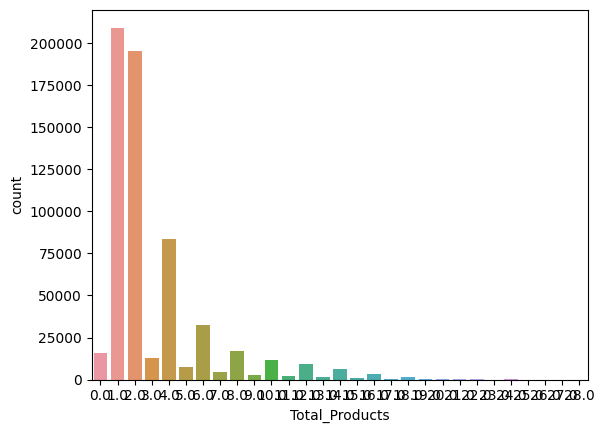

In [45]:
# plot Customer_code for total products
sns.countplot(data=productData, x='Total_Products')